REGRESSION MACHINE LEARNING CASE: ENERGY EFFICIENCY CASE

PROBLEM DEFINATION AND DATA SET
    In this project, We will perform energy analysis using simple linear regression of 12 different building shapes simulated in Ecotect. The buildings differ with respect to the glazing area, the glazing area distribution, and the orientation, amongst other parameters. We simulate various settings as functions of the afore-mentioned characteristics to obtain 768 building shapes. The dataset comprises 768 samples and 8 features, aiming to predict two real valued responses.  
    We will select a sample of the dataset and use the relative compactness column as the predictor and the heating load column the response variable. The data is sourced from [here](https://archive.ics.uci.edu/ml/datasets/Energy+efficiency).
    

 LOAD THE DATA SET AND LIBRARIES
Let’s start off by loading the libraries required for this project.

In [1]:
#import libraries
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
%matplotlib inline



The following command will load the data set 

In [2]:
energy = pd.read_csv("C:/Users/IZZYLYF/OneDrive/hamoyeGIT/MLRegression/ENB2012_data.csv")

DATA EXPLORATION AND PRE-PROCESSING

Explore the data by checking the number of rows and columns in our datasets, as well as the statistical description of the data

In [3]:
energy.shape

(1296, 12)

In [4]:
energy.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2,Unnamed: 10,Unnamed: 11
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000,0.0,0.0
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760,NaN,NaN
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306,NaN,NaN
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000,NaN,NaN
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000,NaN,NaN
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000,NaN,NaN
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500,NaN,NaN
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000,NaN,NaN


We will rename the columns and subset the dataset and use the relative compactness column as the predictor and the heating load column the response variable.

In [5]:
#rename columns
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area', 
                'X3':  'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height',
                'X6': 'Orientation', 'X7': 'Glazing_Area', 
                'X8': 'Glazing_Area_Distribution', 
                'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
energy = energy.rename(columns=column_names)

In [6]:
#select a sample of the dataset
subenergy = energy[['Relative_Compactness', 'Cooling_Load']]

In [7]:
subenergy.shape

subenergy.describe()

,Relative_Compactness,Cooling_Load
count,768.000000,768.000000
mean,0.764167,24.587760
std,0.105777,9.513306
min,0.620000,10.900000
25%,0.682500,15.620000
50%,0.750000,22.080000
75%,0.830000,33.132500
max,0.980000,48.030000


For a better understanding of our data, we will visualize our data points on a 2-D graph to see if we can manually find any relationship between the data.

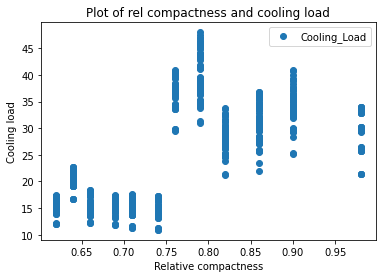

In [8]:
subenergy.plot(x='Relative_Compactness', y='Cooling_Load', style='o')  
plt.title('Plot of rel compactness and cooling load')  
plt.xlabel('Relative compactness')  
plt.ylabel('Cooling load')  
plt.show()

Next we will visualise the Relative compactness and Cooling Load by ploting it we can observe its shape

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Density'>

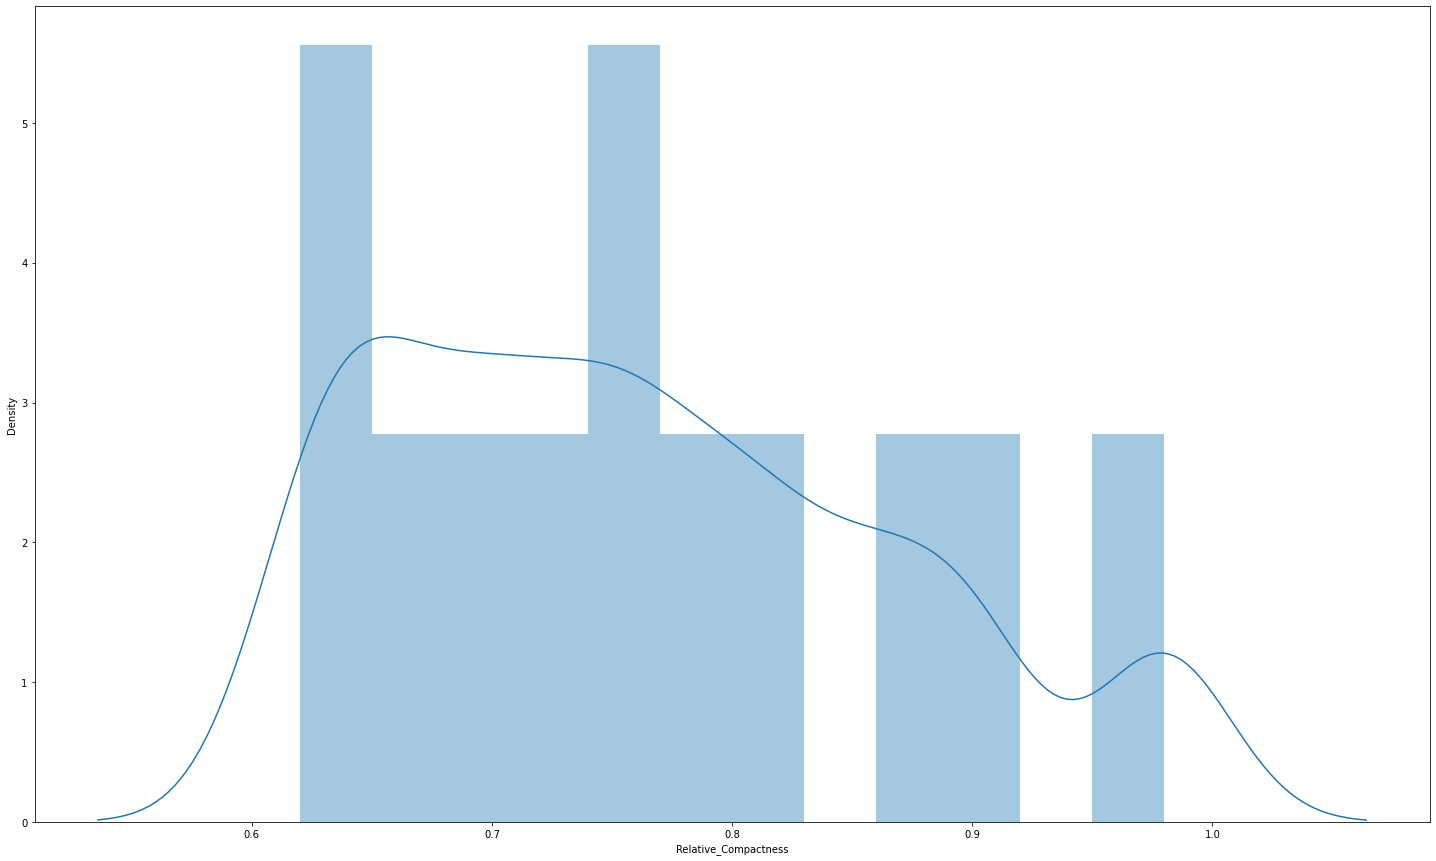

In [9]:
plt.figure(figsize=(25,15))
plt.tight_layout()
seabornInstance.distplot(subenergy['Relative_Compactness'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Cooling_Load', ylabel='Density'>

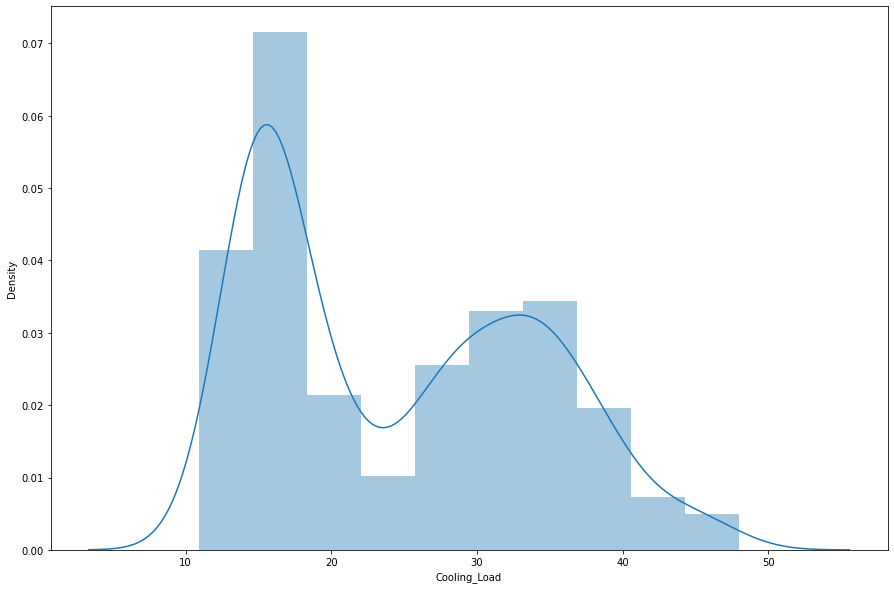

In [10]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(subenergy['Cooling_Load'])

SIMPLE REGRESSION MODEL FITTING

Next we define our data set into attributes(independent variables) and labels(dependent variables) which are to be predicted. In our dataset, we have subset our data frame into two columns to predict the cooling load as it depends on relative compactment.Hence X variable is the attribute (relative compactness), and the label is Y varaible (cooling load) 

In [11]:
X = subenergy['Relative_Compactness']
y = subenergy['Cooling_Load']

We will use the mean of the columns to fill up the NaN of the columns. After which we will transform the data and use it for the simple regression.

In [12]:
print(X.mean())
print(y.mean())

0.7641666666666677
24.58776041666671


In [13]:
Xs= X.fillna(X.mean())
Ys= y.fillna(y.mean())

In [14]:
dfenergy = pd.concat([Xs, Ys], join = 'outer', axis = 1)
print(dfenergy)

      Relative_Compactness  Cooling_Load
0                 0.980000      21.33000
1                 0.980000      21.33000
2                 0.980000      21.33000
3                 0.980000      21.33000
4                 0.900000      28.28000
...                    ...           ...
1291              0.764167      24.58776
1292              0.764167      24.58776
1293              0.764167      24.58776
1294              0.764167      24.58776
1295              0.764167      24.58776

[1296 rows x 2 columns]


In [ ]:
From the above, it is evident that our data does not contain NaN. To run simple regression we will subset a sample of 55, plot the regression plot and extracts such as the intercepts, the regression coefficient and the coefficient of determination

In [15]:
simple_linear_reg_df = dfenergy[['Relative_Compactness', 'Cooling_Load']].sample(55, random_state=2)


<AxesSubplot:xlabel='Relative_Compactness', ylabel='Cooling_Load'>

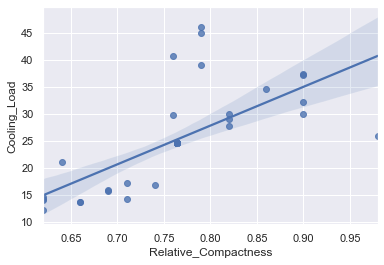

In [16]:
#regression plot
import seaborn as sns; sns.set_theme(color_codes=True)
sns.regplot(x="Relative_Compactness", y="Cooling_Load", data=simple_linear_reg_df)

After assiging attributes and labels we will run our regression models. To do that we will import LinearRegression class, instantiate it, and call the fit() method along with our data.

To obtain various results such as coefficient of determination, intercepts, slopes, perform simple predictions and plot the regression

In [17]:
Linreg = LinearRegression()  
Linreg.fit(simple_linear_reg_df[['Relative_Compactness']],  simple_linear_reg_df[['Cooling_Load']])  

LinearRegression()

In [20]:
#To retrieve the intercept:
print(Linreg.intercept_)

#For retrieving the slope:
print(Linreg.coef_)

#Coefficient of determination
rsq = Linreg.score(simple_linear_reg_df[['Relative_Compactness']],  simple_linear_reg_df[['Cooling_Load']])
print('coefficient of determination:', rsq)

[-29.63040342]
[[71.76764688]]
coefficient of determination: 0.4747540637644039


In [21]:
#Comoute predictions
ypred = Linreg.intercept_ + Linreg.coef_ * simple_linear_reg_df[['Relative_Compactness']]
print('predicted y:', ypred)

predicted y:       Relative_Compactness
1105             25.212040
948              25.212040
1012             25.212040
744              23.477655
397              29.219067
545              27.066038
1175             25.212040
969              25.212040
993              25.212040
1161             25.212040
790              25.212040
330              16.300891
347              32.089773
727              34.960479
1275             25.212040
768              25.212040
1138             25.212040
907              25.212040
287              14.865538
1141             25.212040
851              25.212040
909              25.212040
542              29.219067
848              25.212040
181              17.736244
732              29.219067
436              34.960479
977              25.212040
550              24.913008
1240             25.212040
355              27.066038
792              25.212040
861              25.212040
1274             25.212040
827              25.212040
465            